# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Split dataset
from sklearn.model_selection import train_test_split
# Standardscaller
from sklearn.preprocessing import StandardScaler
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Evaluation metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
# Tuning parameter
from sklearn.model_selection import GridSearchCV
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# **IMPORT DATA**

## **Read Data**

In [ ]:
data_train = pd.read_csv("train.csv")

In [ ]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data_test = pd.read_csv("test.csv")

In [ ]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## **Data Information**

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Berdasarkan output, dapat dilihat bahwa tidak ada data yang hilang, karena semua variabel terdiri dari 2000 entri.

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Data Distribution**

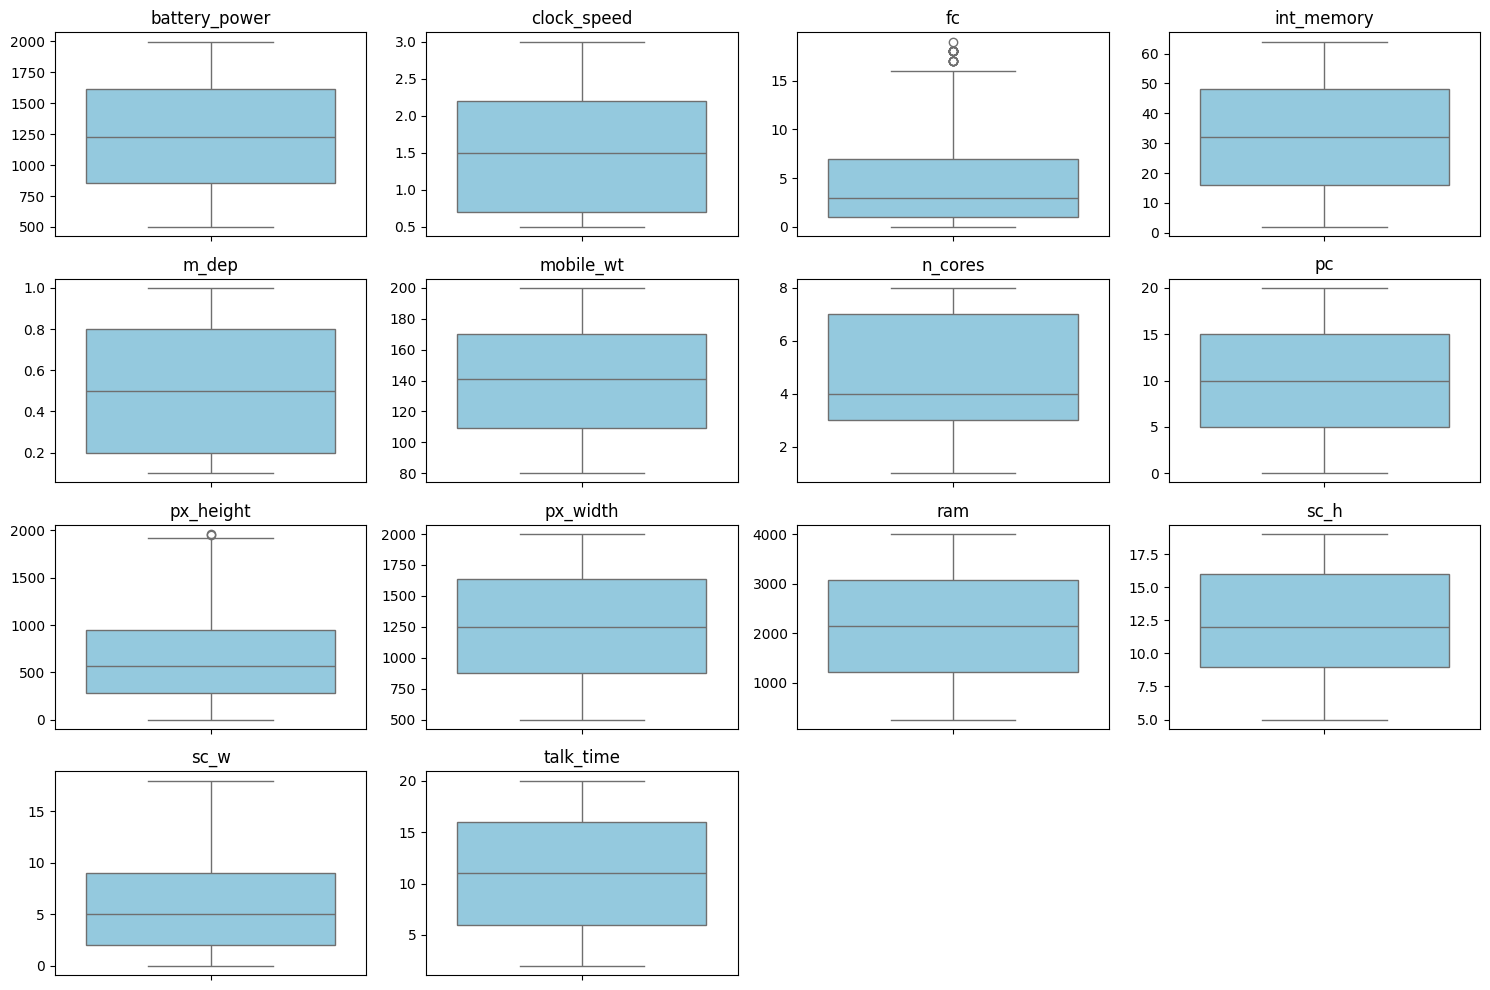

In [ ]:
# List numerical column
col_num = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Create boxplot
plt.figure(figsize=(15,10))
for i, column in enumerate(col_num):
  plt.subplot(4,4,i+1)
  sns.boxplot(data = data_train, y=column, color='skyblue')
  plt.title(column, fontsize = 12)
  plt.xlabel('')
  plt.ylabel('')
  plt.tight_layout();

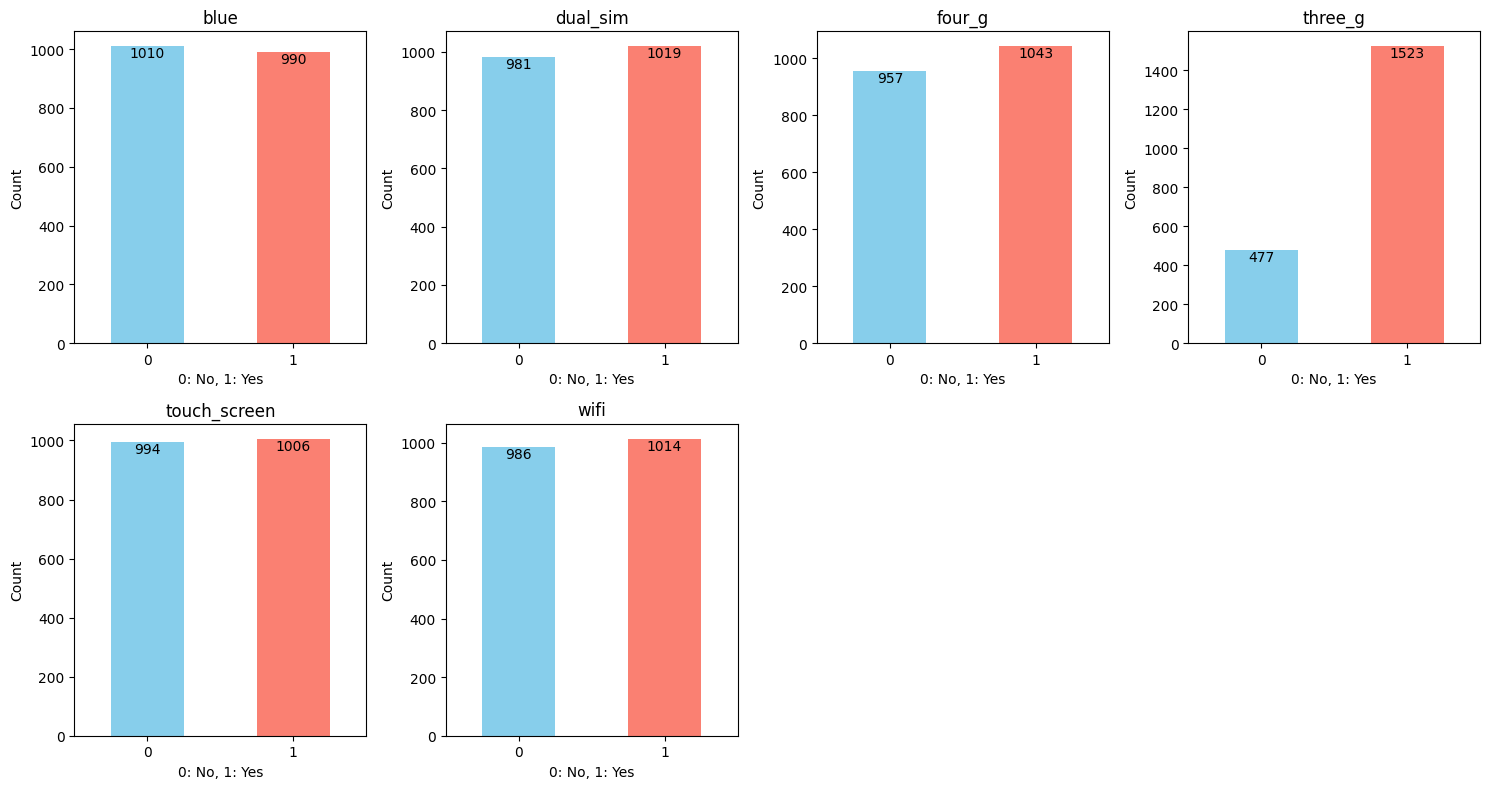

In [ ]:
# List categorical column
col_cat = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Bar plot for col_cat using label 0: yes, 1:no
plt.figure(figsize=(15, 8))
for i, column in enumerate(col_cat):
    plt.subplot(2, 4, i + 1)
    # Count the occurrences of each unique value and plot as a bar chart
    data_train[column].value_counts().sort_index().plot(kind='bar', color=colors)
    plt.title(column, fontsize=12)
    plt.xlabel('0: No, 1: Yes')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    for j, value in enumerate(data_train[column].value_counts().sort_index()):
        plt.text(j, value, str(value), ha='center', va='top')
    plt.tight_layout()
plt.show()

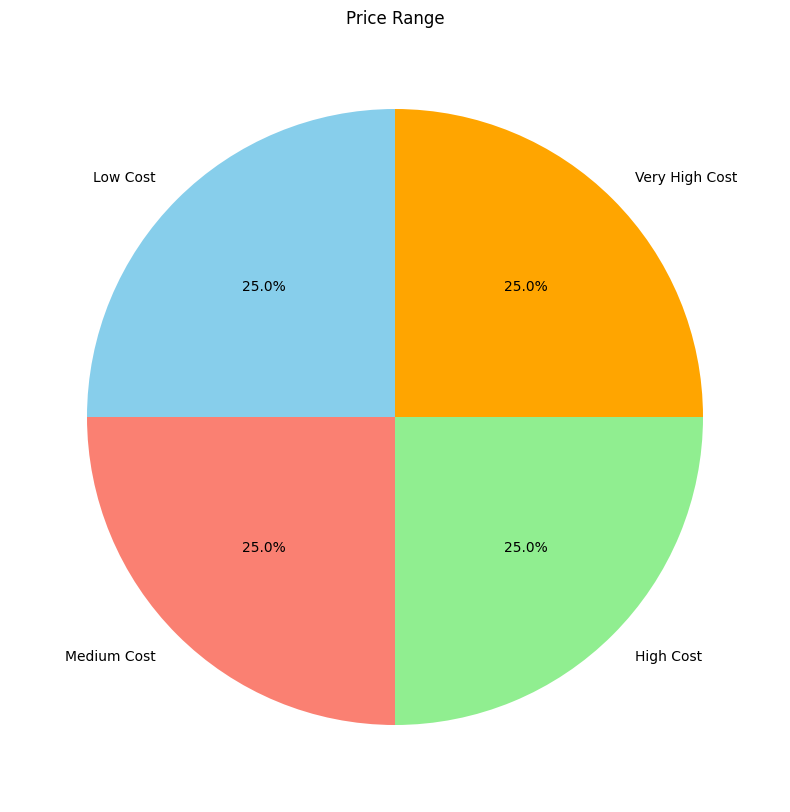

In [ ]:
# Pie chart for price range column
plt.figure(figsize=(10, 10))
plt.pie(data_train['price_range'].value_counts(), labels=['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Price Range')
plt.show()

Berdasarkan output, dapat dilihat bahwa semua kelas memiliki jumlah instance yang seimbang. Hal ini berarti bahwa data tersebut seimbang.

## **Correlation**

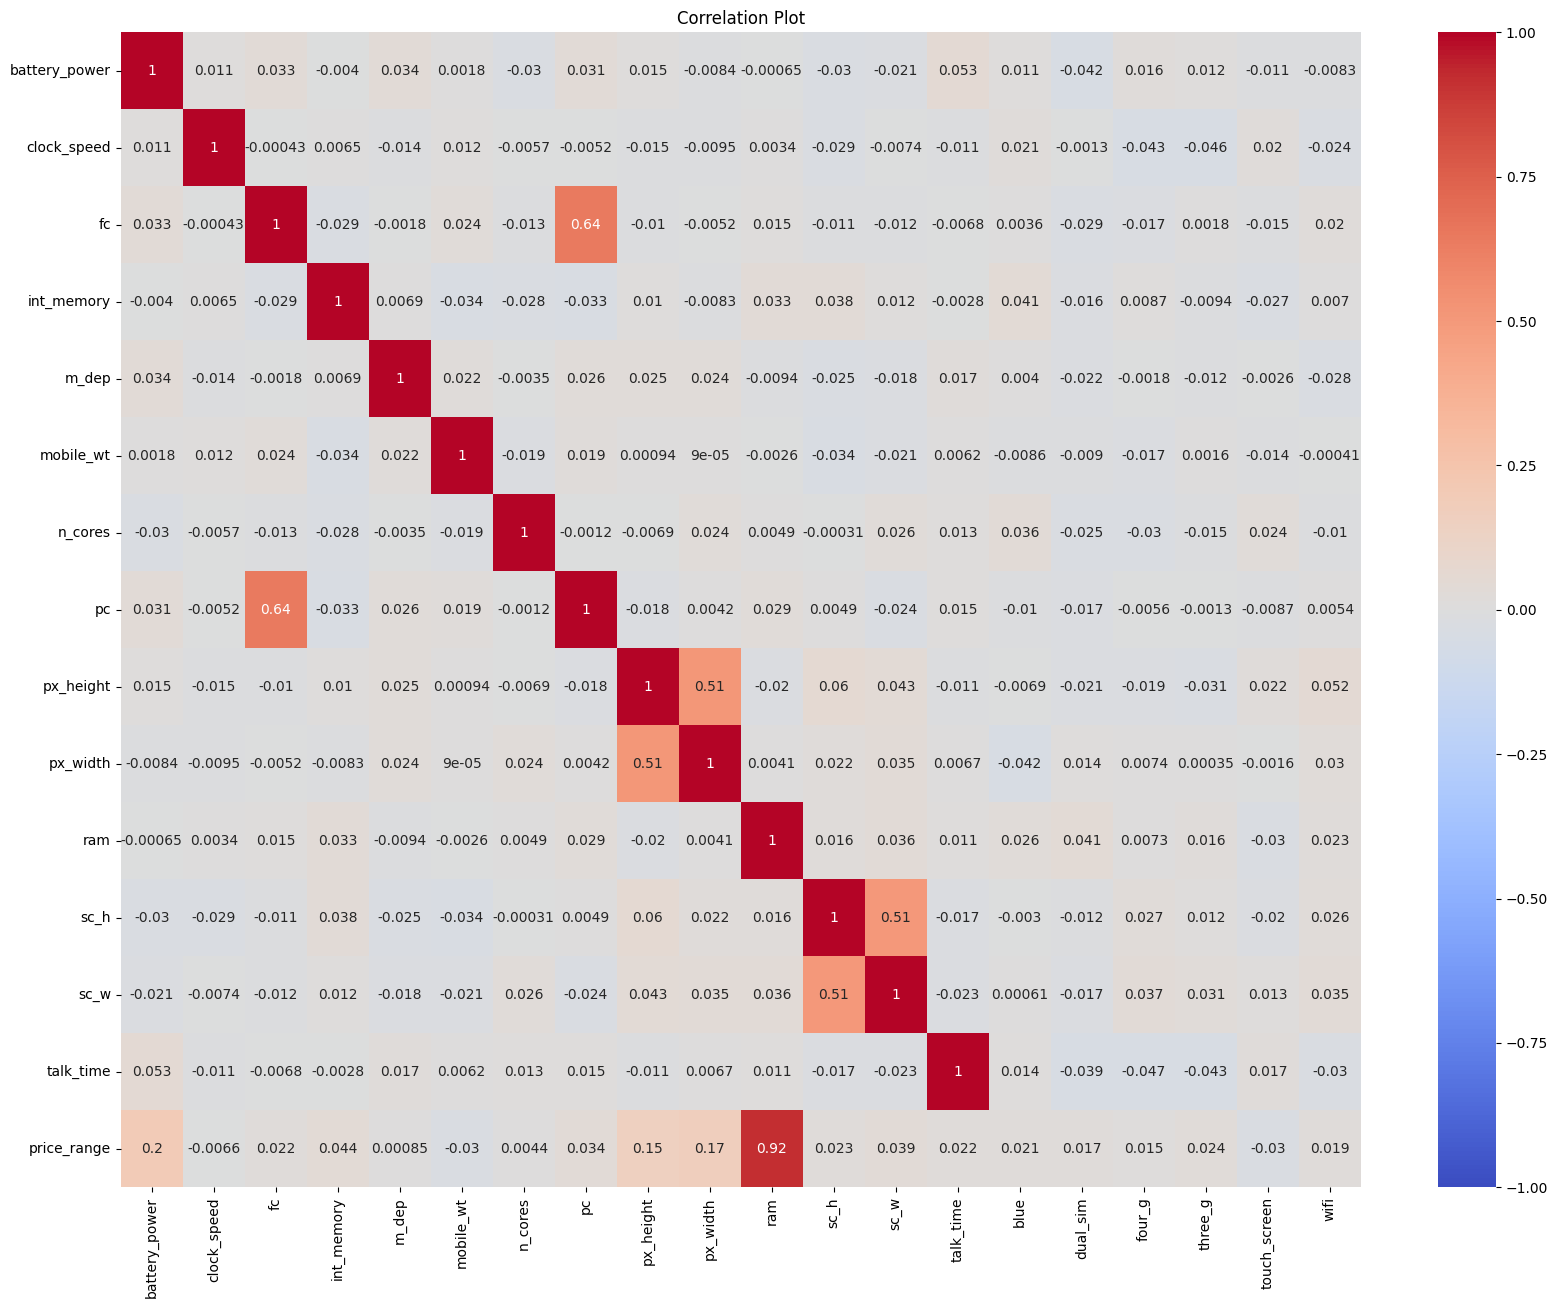

In [ ]:
# List numerical column
col_num = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
# List categorical column
col_cat = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
# Merge column
variables = col_num + col_cat

# Correlation
cor = data_train[variables + ['price_range']].corr()

# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor.loc[col_num + ['price_range'], variables], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

# **DATA PREPROCESSING**

## **Standardization**

In [ ]:
def scale_data(data_train, data_test, num_cols):
    # Copy to avoid changing original data
    scaled_data_train = data_train.copy()
    scaled_data_test = data_test.copy()

    # Initialize scaler
    scaler = StandardScaler()

    # Fit on training data and transform both
    scaled_data_train[num_cols] = scaler.fit_transform(data_train[num_cols])
    scaled_data_test[num_cols] = scaler.transform(data_test[num_cols])

    return scaled_data_train, scaled_data_test, scaler

In [ ]:
num_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

scaled_train, scaled_test, scaler = scale_data(data_train, data_test, num_features)

In [ ]:
print(scaled_train)

      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0         -0.902597     0     0.830779         0 -0.762495       0   
1         -0.495139     1    -1.253064         1 -0.992890       1   
2         -1.537686     1    -1.253064         1 -0.532099       1   
3         -1.419319     1     1.198517         0 -0.992890       0   
4          1.325906     1    -0.395011         0  2.002254       1   
...             ...   ...          ...       ...       ...     ...   
1995      -1.011860     1    -1.253064         1 -0.992890       1   
1996       1.653694     1     1.321096         1 -0.992890       0   
1997       1.530773     0    -0.762748         1 -0.762495       1   
1998       0.622527     0    -0.762748         0 -0.071307       1   
1999      -1.658331     1     0.585621         1  0.159088       1   

      int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0      -1.380644  0.340740   1.349249 -1.101971  ...  -1.408949 -1.146784   
1    

In [ ]:
print(scaled_test)

       id  battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0       1      -0.445060     1     0.340463         1  2.232650       0   
1       2      -0.904874     1    -1.253064         1 -0.071307       1   
2       3       1.294038     1     1.566254         0 -0.762495       0   
3       4       0.699922     0    -1.253064         1  3.154233       1   
4       5       0.444976     0    -0.149853         0  1.541463       1   
..    ...            ...   ...          ...       ...       ...     ...   
995   996       1.050473     1     0.463042         0 -0.992890       1   
996   997      -1.432976     0     0.340463         1 -0.992890       0   
997   998      -0.121824     0    -0.149853         0 -0.762495       1   
998   999       0.670330     1    -1.253064         1 -0.992890       0   
999  1000       0.071662     1    -1.253064         0 -0.071307       1   

     int_memory     m_dep  mobile_wt  ...        pc  px_height  px_width  \
0     -1.490890 -1.3933

# **SPLIT DATA**

In [ ]:
X = scaled_train.drop('price_range', axis=1)
y = scaled_train['price_range']

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,1,1,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,1,1,1
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,1,1,0
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,1,1,1


In [ ]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (1600, 20)
X_test : (400, 20)
y_train : (1600,)
y_test : (400,)


In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
230,0.567896,0,-1.253064,0,-0.762495,0,0.383299,1.034357,-0.798202,0.209639,-0.645989,1.989975,0.915280,0.857373,0.402047,0.971917,1.462493,0,0,0
1271,1.605891,1,0.340463,1,-0.992890,1,-0.057686,1.034357,-1.504600,-0.227564,0.013773,1.050087,0.255697,0.401847,-1.259796,-0.635317,-0.551204,1,0,0
1311,-1.355582,1,-1.007906,1,-0.301703,1,-0.498672,1.034357,0.445059,-1.539175,-0.151168,-0.746294,0.343641,-0.026016,0.164641,0.053498,-1.649584,1,0,0
414,-1.209899,0,0.708200,1,-0.532099,0,-0.388426,1.034357,-0.261339,-0.664768,1.168355,-0.338333,-1.567991,1.580312,-0.784983,-0.864922,-0.734267,1,0,1
811,-0.982268,0,-1.253064,0,1.080671,0,-1.325520,-0.699686,0.501571,0.209639,1.663176,0.049343,-1.283329,-0.774775,1.114266,1.660732,-1.649584,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1.323630,1,0.217884,1,-0.992890,1,1.761380,0.340740,0.586339,-1.539175,-1.140810,1.153768,1.618835,-1.429478,-0.547577,-0.864922,1.279430,1,1,0
1077,0.752277,0,-0.885327,1,0.850275,0,1.485763,1.381165,-0.826458,-0.664768,1.003414,1.388176,0.304298,1.427241,0.639453,-0.864922,0.730240,1,0,1
1318,0.083043,1,-1.253064,1,-0.301703,1,-1.490890,-1.046495,0.332035,-1.539175,-0.151168,-1.411202,-1.736937,1.530518,0.164641,-0.405712,-1.283457,1,1,0
723,0.073938,0,-1.253064,1,-0.532099,0,1.210147,-1.393304,0.529827,1.521249,-1.140810,-0.072369,-1.392103,-1.045877,0.402047,1.201522,-0.917331,0,1,1


In [ ]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1748,-0.688625,1,0.953358,0,0.159088,1,1.375517,-1.046495,-0.317851,-1.101971,-0.645989,0.026804,-0.725577,-0.069355,-0.072765,0.512708,-1.100394,1,1,0
934,-1.560450,0,-1.253064,1,-0.532099,1,-0.498672,-0.006069,-0.600410,-0.664768,-1.140810,0.784124,0.614417,0.790058,-1.259796,-0.635317,0.547176,1,0,0
1033,0.895684,1,-0.149853,0,-0.992890,0,0.493546,-1.393304,-0.233083,-0.227564,-1.470690,0.137246,0.859736,0.451641,-1.734608,-0.405712,0.730240,1,0,0
243,1.546707,0,0.463042,0,-0.532099,0,-1.215274,0.340740,-0.854714,0.209639,0.013773,1.183069,0.674590,-0.375498,-1.259796,-1.094526,0.913303,1,1,1
928,0.251490,1,0.830779,1,0.159088,0,1.265271,-1.393304,-0.995993,1.084046,-0.481048,0.006518,-0.538116,0.311479,0.639453,0.283103,1.096367,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,-1.464845,0,1.321096,0,-0.992890,1,-0.664042,-0.352878,-0.515642,-1.101971,1.333295,-0.049830,-1.007925,-0.489841,1.589078,1.201522,-1.649584,1,0,1
858,1.455655,1,-1.253064,0,1.080671,0,-0.167933,0.340740,-1.561112,1.521249,1.498235,-0.980702,-0.521916,-0.728669,1.351672,0.283103,-1.649584,0,0,0
1766,-0.558875,1,0.953358,1,-0.992890,0,-0.884535,-0.352878,-0.967737,1.084046,0.508594,-0.498362,0.896765,-0.932457,0.402047,-1.094526,-0.917331,0,0,1
1353,0.449528,0,1.198517,1,-0.992890,1,0.548669,1.381165,-0.459131,1.521249,-1.470690,2.661646,1.352687,0.564139,-0.072765,-0.176107,1.462493,1,1,0


In [ ]:
y_train

,price_range
230,3
1271,3
1311,1
414,3
811,0
...,...
1228,1
1077,3
1318,3
723,0


In [ ]:
y_test

,price_range
1748,1
934,2
1033,2
243,2
928,2
...,...
1515,0
858,1
1766,0
1353,3


# **MODELLING**

In [ ]:
# pipeline
from sklearn.pipeline import Pipeline

## **Logistic Regression**

In [ ]:
# Define pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

# Define params
lr_param = {
    'lr__penalty': ['l2'],
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__solver': ['lbfgs', 'newton-cg', 'newton-cholesky']
}

# Hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=lr_pipeline, param_grid=lr_param, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters: ", grid_search_lr.best_params_)
print("Best score: ", grid_search_lr.best_score_)

# Best model
best_model_lr = grid_search_lr.best_estimator_

# Accuracy
print('Accuracy: ', best_model_lr.score(X_test, y_test))

Best parameters:  {'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'newton-cholesky'}
Best score:  0.9725000000000001
Accuracy:  0.9725


## **Decision Tree Classifier**

In [ ]:
# Define pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

# Define params
dt_param = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [2, 3, 5],
    'dt__min_samples_leaf': [5, 10, 20],
    'dt__min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=dt_pipeline, param_grid=dt_param, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print("Best parameters: ", grid_search_dt.best_params_)
print("Best score: ", grid_search_dt.best_score_)

# Best model
best_model_dt = grid_search_dt.best_estimator_

# Accuracy
print('Accuracy: ', best_model_dt.score(X_test, y_test))

Best parameters:  {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}
Best score:  0.828125
Accuracy:  0.8425


## **Random Forest Classifier**

In [ ]:
# Define pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Define params
rf_param = {
    'rf__n_estimators': [10, 25, 30],
    'rf__max_depth': [2, 3, 5],
    'rf__min_samples_leaf': [5, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

# Best model
best_model_rf = grid_search_rf.best_estimator_

# Accuracy
print('Accuracy: ', best_model_rf.score(X_test, y_test))

Best parameters:  {'rf__max_depth': 5, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 30}
Best score:  0.825
Accuracy:  0.805


## **Table Comparison**

In [ ]:
model = ['Logistic Regression',
         'Decision Tree Classifier',
         'Random Forest Classifier']

best_score = [grid_search_lr.best_score_*100,
              grid_search_dt.best_score_*100,
              grid_search_rf.best_score_*100]

best_accuracy = [best_model_lr.score(X_test, y_test)*100,
                 best_model_dt.score(X_test, y_test)*100,
                 best_model_rf.score(X_test, y_test)*100]

data = {'Model': model, 'Best Score': best_score, 'Best Accuracy': best_accuracy}

df = pd.DataFrame(data)
df

,Model,Best Score,Best Accuracy
0,Logistic Regression,97.2500,97.25
1,Decision Tree Classifier,82.8125,84.25
2,Random Forest Classifier,82.5000,80.50


Based on the output above, it can be seen that the Logistic Regression model is the best model. The parameters used to train the model have a value of 97.25%, which is the same as the accuracy when training the model.

# **MODEL EVALUATION**

## **Logistic Regression**

In [ ]:
y_pred_lr = best_model_lr.predict(X_test)
y_pred_lr

array([1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 1,
       1, 0, 3, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 2, 2, 1, 2, 2, 3, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 1, 1, 2, 0, 1, 3, 0, 1, 2, 2, 2, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       2, 2, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 1, 2, 3, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 2, 0, 2, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 0, 0, 1, 3, 1, 1, 3, 1,
       3, 0, 2, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 3, 3, 0, 2, 2, 3, 3, 1, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       2, 0, 2, 2, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 2, 1, 0, 1, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 2, 1, 0, 3, 0, 0, 2, 3, 0, 3, 2, 1, 1, 3, 0, 1, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 3,

In [ ]:
y_pred_probs_lr = best_model_lr.predict_proba(X_test)
y_pred_probs_lr

array([[2.95879386e-09, 9.99975956e-01, 2.40415006e-05, 2.62163669e-21],
       [2.01669551e-32, 2.42999434e-09, 9.98890621e-01, 1.10937641e-03],
       [1.65645656e-38, 1.82081171e-12, 8.95631816e-01, 1.04368184e-01],
       ...,
       [9.82553827e-01, 1.74461732e-02, 5.74910863e-16, 2.60996173e-41],
       [7.67172498e-60, 5.98634009e-27, 6.03949093e-09, 9.99999994e-01],
       [9.99999992e-01, 8.24473694e-09, 9.65298871e-29, 1.33656406e-60]])

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)*100}')
print(f'Precision: {precision_score(y_test, y_pred_lr, average="macro")*100}')
print(f'Recall: {recall_score(y_test, y_pred_lr, average="macro")*100}')
print(f'F1 score: {f1_score(y_test, y_pred_lr, average="macro")*100}')

Accuracy: 97.25
Precision: 97.25689984082167
Recall: 97.24163557494147
F1 score: 97.24810727568772


Berdasarkan output evaluasi:
- Dari 400 data yang diprediksi, model mampu memprediksi 389 data dengan benar, sehingga akurasi model adalah 97,25%. Ini berarti hanya 11 prediksi yang tidak sesuai dengan label yang sebenarnya.
- Presisi model sebesar 97,25% menunjukkan bahwa dari semua prediksi yang dibuat untuk setiap kelas, sekitar 97,25% sesuai dengan kelas aslinya, sedangkan 2,75% tidak sesuai dengan kelas aslinya. Ini berarti bahwa model tersebut **jarang memberikan** label yang salah (False Positive).
- Recall model sebesar 97,24% menunjukkan bahwa dari semua data yang sebenarnya termasuk dalam setiap kelas, model mengidentifikasi dengan benar sekitar 97,24%, sedangkan 2,76% tidak dapat diidentifikasi. Ini berarti bahwa model **jarang melewatkan** data yang seharusnya diidentifikasi (False Negative).
-Dengan nilai F1 sebesar 97.24%, menunjukkan bahwa presisi dan recall seimbang, sehingga model tidak hanya akurat dalam prediksi, tetapi juga konsisten dalam mengenali semua kelas.

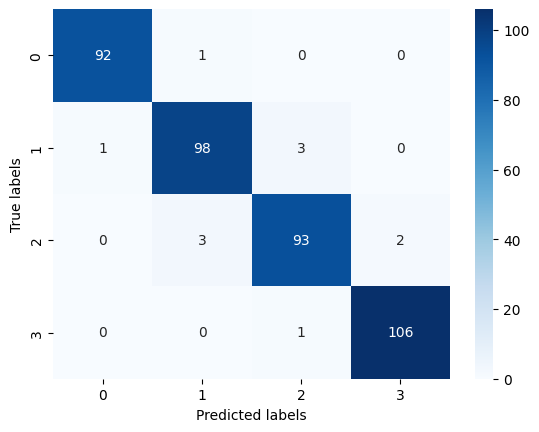

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Berdasarkan plot konfusi matriks di atas:
- Untuk kelas 0, model berhasil mengklasifikasikan 92 dari 93 data dengan benar dan hanya 1 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1.
- Untuk kelas 1, model berhasil mengklasifikasikan 98 dari 102 data dengan benar dan hanya 4 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 0 dan kelas 2.
- Untuk kelas 2, model berhasil mengklasifikasikan 93 dari 98 data dengan benar dan hanya 5 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1 dan kelas 3. Selain itu, 4 data dari kelas 1 dan 3 juga salah diprediksi sebagai kelas 2.
- Untuk kelas 3, model berhasil mengklasifikasikan 106 dari 107 data dengan benar dan hanya 1 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 2. Selain itu, 2 data dari kelas 2 juga salah diprediksi sebagai kelas 3.

In [ ]:
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.96      0.96      0.96       102
           2       0.96      0.95      0.95        98
           3       0.98      0.99      0.99       107

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
lr_roc_auc = roc_auc_score(y_test, y_pred_probs_lr, multi_class='ovr')
print('ROC AUC score:', lr_roc_auc)

ROC AUC score: 0.9989002211444267


Model memiliki kemampuan yang sangat baik dalam membedakan antar kelas. Dengan AUC sebesar 99,89%, kemungkinan besar prediksi model dapat membedakan data antar kategori dengan tingkat akurasi yang sangat tinggi

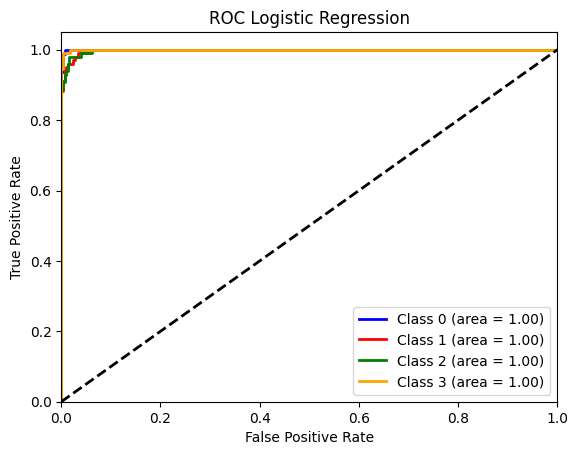

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):  # 4 CLASS
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs_lr[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## **Decision Tree Classifier**

In [ ]:
y_pred_dt = best_model_dt.predict(X_test)
y_pred_dt

array([1, 2, 3, 2, 1, 2, 1, 3, 1, 3, 3, 3, 0, 3, 3, 0, 3, 2, 2, 2, 0, 1,
       2, 0, 3, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 3, 1, 3, 3, 1, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 2, 1, 2, 0, 1, 2, 0, 1, 3, 2, 3, 0, 1, 0, 2, 3, 3, 3, 2, 1, 1,
       2, 2, 0, 1, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 3, 0, 2, 1, 1, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 1, 2, 2, 0, 3, 2, 1, 1, 2, 0, 0, 2, 3, 2, 1, 2, 1,
       3, 0, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 3, 2, 0, 1, 0,
       1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 1, 3, 0, 0, 3, 1, 1, 3, 3, 3, 3, 3,
       2, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 1, 3, 2,
       2, 0, 1, 3, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 2, 1, 1, 2, 3, 1, 0, 0,
       0, 0, 2, 3, 2, 2, 0, 0, 3, 0, 0, 2, 3, 0, 3, 3, 2, 1, 3, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 3,

In [ ]:
y_pred_probs_dt = best_model_dt.predict_proba(X_test)
y_pred_probs_dt

array([[0.10679612, 0.89320388, 0.        , 0.        ],
       [0.        , 0.        , 0.81538462, 0.18461538],
       [0.        , 0.        , 0.13888889, 0.86111111],
       ...,
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.81538462, 0.18461538],
       [1.        , 0.        , 0.        , 0.        ]])

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)*100}')
print(f'Precision: {precision_score(y_test, y_pred_dt, average="macro")*100}')
print(f'Recall: {recall_score(y_test, y_pred_dt, average="macro")*100}')
print(f'F1 score: {f1_score(y_test, y_pred_dt, average="macro")*100}')

Accuracy: 84.25
Precision: 84.16328175370728
Recall: 84.31901099300137
F1 score: 84.2210719967926


Berdasarkan output evaluasi:
- Dari 400 data yang diprediksi, model mampu memprediksi 337 data dengan benar, sehingga akurasi model adalah 84,25%. Ini berarti bahwa 63 prediksi yang tidak sesuai dengan label yang sebenarnya.
- Presisi model sebesar 84,16% menunjukkan bahwa dari semua prediksi yang dibuat untuk setiap kelas, sekitar 84,16% sesuai dengan kelas aslinya, sedangkan 15,84% tidak sesuai dengan kelas aslinya. Ini berarti bahwa model sedikit memberikan label yang salah (False Positive).
- Recall model sebesar 84,31% menunjukkan bahwa dari semua data yang sebenarnya termasuk ke dalam kelas, model mengidentifikasi dengan benar sekitar 84,31%, sedangkan 15,69% tidak dapat diidentifikasi. Ini berarti bahwa model sedikit melewaktkan data yang seharusnya diidentifikasi (False Negative).
- Dengan nilai f1 sebesar 84,22% menunjukkan bahwa presisi dan recall seimbang. Ini berarti bahwa model tidak hanya akurat dalam prediksi, tetapi juga konsisten dalam mengenali semua kelas.

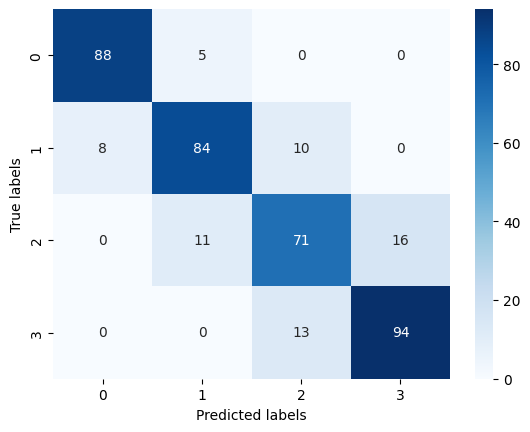

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Berdasarkan plot konfusi matriks di atas:
- Untuk kelas 0, model berhasil mengklasifikasikan 88 dari 93 data dengan benar dan hanya 5 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1. Selain itu, 8 data dari kelas 1 juga salah diprediksi sebagai kelas 0.
- Untuk kelas 1, model berhasil mengklasifikasikan 84 dari 102 data dengan benar dan hanya 18 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 0 dan kelas 2. Selain itu, 16 data dari kelas 0 dan kelas 2 juga salah diprediksi sebagai kelas 1.
- Untuk kelas 2, model berhasil mengklasifikasikan 71 dari 98 data dengan benar dan hanya 27 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1 dan kelas 3. Selain itu, 14 data dari kelas 1 dan kelas 3 juga salah diprediksi sebagai kelas 2.
- Untuk kelas 3, model berhasil mengklasifikasikan 94 dari 107 data dengan benar dan hanya 13 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 2. Selain itu, 16 data dari kelas 2 juga salah diprediksi sebagai kelas 3.

In [ ]:
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        93
           1       0.84      0.82      0.83       102
           2       0.76      0.72      0.74        98
           3       0.85      0.88      0.87       107

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
lr_roc_auc = roc_auc_score(y_test, y_pred_probs_dt, multi_class='ovr')
print('ROC AUC score:', lr_roc_auc)

ROC AUC score: 0.9535473321112935


Model memiliki kemampuan yang sangat baik dalam membedakan antar kelas. Dengan AUC sebesar 95,35%, kemungkinan besar prediksi model dapat membedakan data antar kategori dengan tingkat akurasi yang sangat tinggi

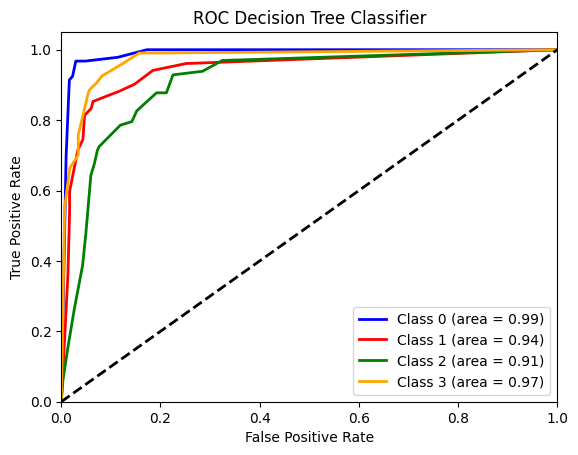

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):  # 4 CLASS
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs_dt[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

## **Random Forest Classifier**

In [ ]:
y_pred_rf = best_model_rf.predict(X_test)
y_pred_rf

array([1, 2, 2, 1, 2, 2, 1, 3, 1, 3, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 1,
       1, 0, 3, 1, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 1, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 2, 3, 1, 2, 1, 2, 2, 3, 3, 3, 1, 0, 2, 3, 2, 3,
       3, 1, 1, 1, 0, 2, 3, 0, 1, 3, 1, 3, 0, 0, 0, 2, 3, 2, 3, 3, 1, 1,
       1, 2, 0, 1, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 3, 3, 1, 1, 3, 0, 1, 0, 2, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 3, 2, 1, 3, 2,
       3, 0, 2, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 3, 0, 2, 0,
       1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 1, 3, 0, 0, 3, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 2, 2, 2,
       2, 0, 1, 3, 3, 2, 3, 0, 1, 3, 1, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 0,
       0, 0, 2, 3, 2, 1, 1, 0, 3, 0, 0, 2, 3, 0, 3, 3, 1, 0, 3, 0, 0, 2,
       0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 3, 3,

In [ ]:
y_pred_probs_rf = best_model_rf.predict_proba(X_test)
y_pred_probs_rf

array([[0.19552633, 0.44936159, 0.2487426 , 0.10636948],
       [0.10799778, 0.17991347, 0.39713461, 0.31495414],
       [0.10121148, 0.14589898, 0.42706946, 0.32582008],
       ...,
       [0.47706916, 0.38550801, 0.09702855, 0.04039429],
       [0.03843241, 0.07429976, 0.29550327, 0.59176457],
       [0.5435697 , 0.23928968, 0.13868293, 0.07845769]])

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)*100}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="macro")*100}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="macro")*100}')
print(f'F1 score: {f1_score(y_test, y_pred_rf, average="macro")*100}')

Accuracy: 83.25
Precision: 82.61078595317726
Recall: 83.32557321994219
F1 score: 82.79635651475787


Berdasarkan output evaluasi:

- Dari 400 data yang diprediksi, model mampu memprediksi 333 data dengan benar, sehingga akurasi model adalah 83,25%. Ini berarti bahwa ada 67 prediksi yang tidak sesuai dengan label yang sebenarnya.
- Presisi model sebesar 82,61% menunjukkan bahwa dari semua prediksi yang dibuat untuk setiap kelas, sekitar 82,61% sesuai dengan kelas aslinya, sedangkan 17,39% tidak sesuai dengan kelas aslinya. Ini berarti bahwa model sedikit memberikan label yang salah (False Positive).
- Recall model sebesar 83,32% menunjukkan bahwa dari semua data yang sebenarnya termasuk ke dalam kelas, model mengidentifikasi dengan benar sekitar 83,32%, sedangkan 16,68% tidak dapat diidentifikasi. Ini berarti bahwa model sedikit melewaktkan data yang seharusnya diidentifikasi (False Negative).
- Dengan nilai f1 sebesar 84,79% menunjukkan bahwa presisi dan recall seimbang. Ini berarti bahwa model tidak hanya akurat dalam prediksi, tetapi juga konsisten dalam mengenali semua kelas.

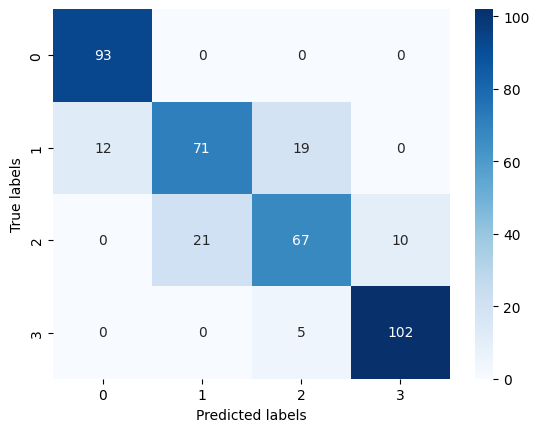

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Berdasarkan plot konfusi matriks di atas:
- Untuk kelas 0, model berhasil mengklasifikasikan 93 dari 93 data dengan benar. Selain itu, 12 data dari kelas 1 salah diprediksi sebagai kelas 0.
- Untuk kelas 1, model berhasil mengklasifikasikan 71 dari 102 data dengan benar dan hanya 31 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 0 dan kelas 2. Selain itu, 21 data dari kelas 2 juga salah diprediksi sebagai kelas 1.
- Untuk kelas 2, model berhasil mengklasifikasikan 67 dari 98 data dengan benar dan hanya 31 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1 dan kelas 3. Selain itu, 24 data dari kelas 1 dan kelas 3 juga salah diprediksi sebagai kelas 2.
- Untuk kelas 3, model berhasil mengklasifikasikan 102 dari 107 data dengan benar dan hanya 5 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 2. Selain itu, 10 data dari kelas 2 juga salah diprediksi sebagai kelas 3.

In [ ]:
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        93
           1       0.77      0.70      0.73       102
           2       0.74      0.68      0.71        98
           3       0.91      0.95      0.93       107

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
lr_roc_auc = roc_auc_score(y_test, y_pred_probs_rf, multi_class='ovr')
print('ROC AUC score:', lr_roc_auc)

ROC AUC score: 0.9556771938495602


Model memiliki kemampuan yang sangat baik dalam membedakan antar kelas. Dengan AUC sebesar 95,56%, kemungkinan besar prediksi model dapat membedakan data antar kategori dengan tingkat akurasi yang sangat tinggi

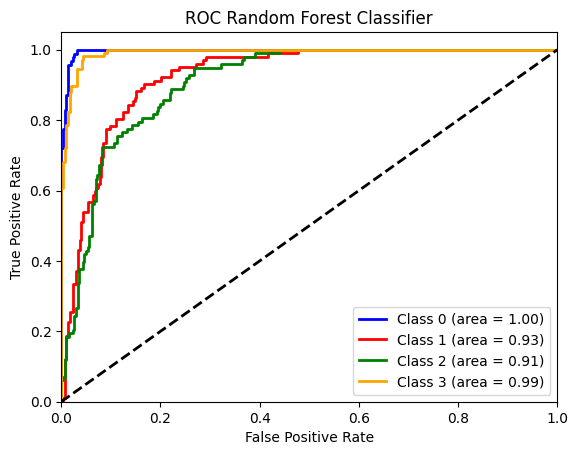

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):  # 4 CLASS
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs_rf[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## **Table Comparison**

In [ ]:
score_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_lr, average="macro"), precision_score(y_test, y_pred_dt, average="macro"), precision_score(y_test, y_pred_rf, average="macro")],
    'Recall': [recall_score(y_test, y_pred_lr, average="macro"), recall_score(y_test, y_pred_dt, average="macro"), recall_score(y_test, y_pred_rf, average="macro")],
    'F1 Score': [f1_score(y_test, y_pred_lr, average="macro"), f1_score(y_test, y_pred_dt, average="macro"), f1_score(y_test, y_pred_rf, average="macro")],
    'ROC AUC Score': [roc_auc_score(y_test, y_pred_probs_lr, multi_class='ovr'), roc_auc_score(y_test, y_pred_probs_dt, multi_class='ovr'), roc_auc_score(y_test, y_pred_probs_rf, multi_class='ovr')]
})
score_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.9725,0.972569,0.972416,0.972481,0.998900
1,Decision Tree Classifier,0.8425,0.841633,0.843190,0.842211,0.953547
2,Random Forest Classifier,0.8325,0.826108,0.833256,0.827964,0.955677


Berdasarkan output di atas, model Regresi Logistik adalah model terbaik untuk mengklasifikasikan harga ponsel

# **PREDICTION**

In [ ]:
scaled_test.drop('id', axis=1, inplace=True)

In [ ]:
scaled_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1,0.340463,1,2.232650,0,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,0,1,0
1,-0.904874,1,-1.253064,1,-0.071307,1,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,1,0,0
2,1.294038,1,1.566254,0,-0.762495,0,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,0,1,1
3,0.699922,0,-1.253064,1,3.154233,1,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,1,1,0
4,0.444976,0,-0.149853,0,1.541463,1,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.050473,1,0.463042,0,-0.992890,1,1.210147,-0.006069,0.840642,1.084046,1.168355,-0.002497,-0.783435,-0.002963,0.402047,0.512708,0.730240,1,1,0
996,-1.432976,0,0.340463,1,-0.992890,0,-1.049904,1.381165,1.292737,-0.227564,-1.305750,1.142498,0.880565,-0.176321,-1.022389,-1.094526,1.462493,0,1,1
997,-0.121824,0,-0.149853,0,-0.762495,1,-1.325520,-0.006069,-1.702391,-1.539175,0.343653,-0.378903,-0.987096,-0.831024,-1.734608,-1.324131,0.547176,1,0,0
998,0.670330,1,-1.253064,1,-0.992890,0,0.989655,-0.352878,0.868898,-1.101971,0.343653,-1.368378,-0.970895,0.354819,0.639453,1.201522,-0.917331,0,1,0


In [ ]:
prediction = best_model_lr.predict(scaled_test)

In [ ]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
data_prediction = pd.DataFrame({
    "id": scaled_test.index,
    "price_range": prediction
})

In [ ]:
price_range_mapping = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost'
}

In [ ]:
data_prediction['price_range'] = data_prediction['price_range'].map(price_range_mapping)

In [ ]:
print(data_prediction)

      id     price_range
0      0  Very High Cost
1      1  Very High Cost
2      2       High Cost
3      3  Very High Cost
4      4     Medium Cost
..   ...             ...
995  995       High Cost
996  996     Medium Cost
997  997        Low Cost
998  998       High Cost
999  999       High Cost

[1000 rows x 2 columns]


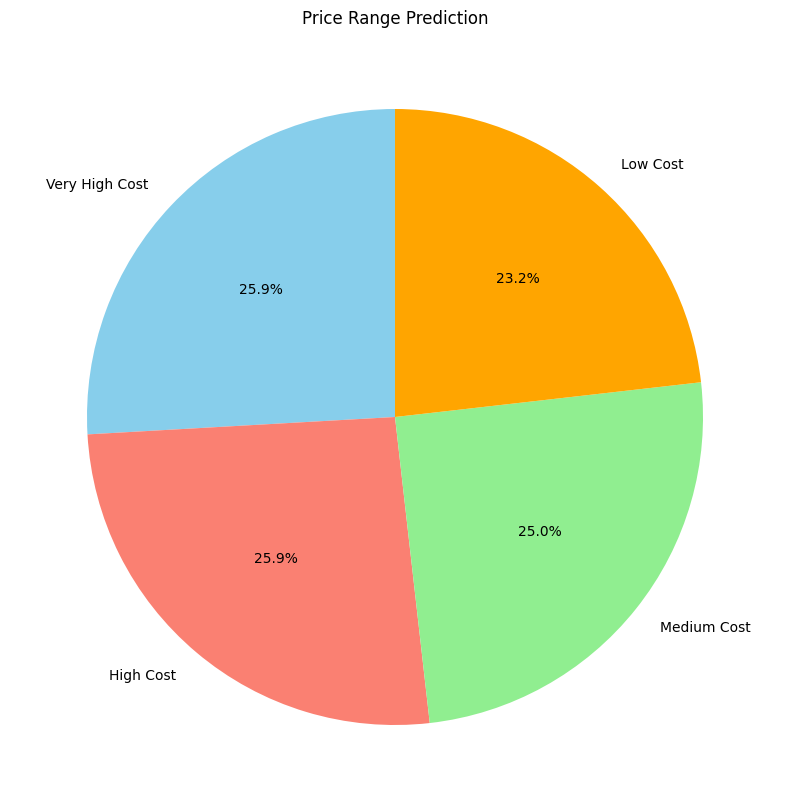

In [ ]:
# PIE CHART FOR PREDICTION
plt.figure(figsize=(10, 10))
plt.pie(data_prediction['price_range'].value_counts(), labels=data_prediction['price_range'].unique(),
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Price Range Prediction')
plt.show()

- Berdasarkan plot tersebut dapat diketahui bahwa proporsi ponsel yang diklasifikasikan sebagai "Very High Cost" dan "High Cost" memiliki proporsi yang paling tinggi. Ini berarti bahwa dari 1000 data yang diprediksi, ada sebanyak 259 ponsel diklasifikasikan ke dalam masing-masing harga tersebut.
- Kemudian diikuti oleh ponsel yang diklasifikasikan sebagai "Medium Cost". Ini berarti bahwa ada sebanyak 250 ponsel diklasifikasikan ke dalam harga tersebut.
- Terdapat sebanyak 232 ponsel diklasifikasikan ke dalam "Low Cost"